In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.pipeline import make_pipeline
import warnings
warnings.filterwarnings("ignore")

In [8]:
df = pd.read_excel('dataset(column duplication app, version.alireza).xls')
initial_pain = df['Pain Level - Initial']
onehr_pain = df['Pain Level - After 1 hour']
X = df[['Age','Height', 'Weight', 'Pain Level - Initial', 'Time', 'Radiation Dose', 'Citanest % 2 (cc)', 'Iohexol 300 mg/ml (cc)']]
y = np.array(abs(initial_pain - onehr_pain))
X.fillna(0, inplace=True)

In [9]:
def plotErrorScores(error1, error2, error3, filename):
    labels = ['MAE', 'MSE', 'R2']
    index = np.arange(len(labels))
    plotter = plt.bar(index, [error1, error2, error3])
    plotter[0].set_color('r'), plotter[1].set_color('b'), plotter[2].set_color('y')
    plt.xlabel('Error Algorithms', fontsize=10)
    plt.ylabel('Error Algorithms\'s Scores', fontsize=10)
    plt.xticks(index, labels, fontsize=10, rotation=30)
    plt.ylim((0, 5))
    plt.title('Error Scores')
    plt.legend((plotter[0], plotter[1], plotter[2]), (error1, error2, error3))
    plt.savefig(filename, dpi=300, bbox_inches='tight')
    plt.show()

### Baseline Approach: Model based on numerical values, NaN replaced by zero

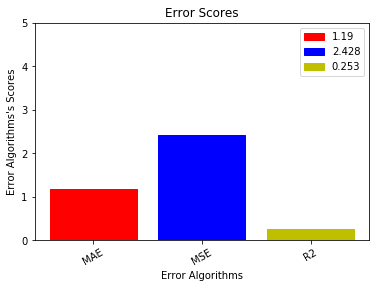

In [10]:
X = np.array(X)
y[np.isnan(y)] = 0.0
pipe_lr = make_pipeline(StandardScaler(), LinearRegression(n_jobs=-1))
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, stratify=y, test_size=0.3)
pipe_lr.fit(X_train, y_train)
y_pred = pipe_lr.predict(X_test)
mae = round(mean_absolute_error(y_test, y_pred),3)
mse = round(mean_squared_error(y_test, y_pred),3)
r2 = round(r2_score(y_test, y_pred),3)
plotErrorScores(mae, mse, r2, 'error scores (baseline app, nan replaced by 0)')